<a href="https://colab.research.google.com/github/Cola0912/3dp-webcam-detection/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


画像の読み込みに成功しました。


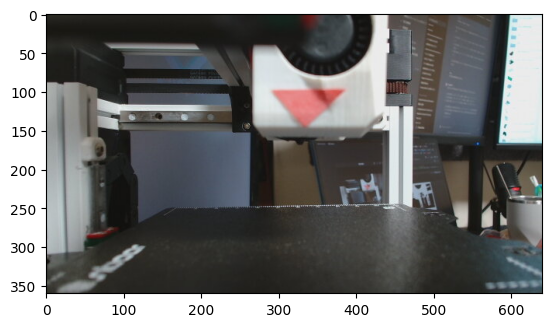

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import

image_path = '/content/drive/MyDrive/3dp-webcam-detection/testpicturs/3.jpg'
image = cv2.imread(image_path)
if image is None:
    print("画像の読み込みに失敗しました。ファイルパスを確認してください。")
else:
    print("画像の読み込みに成功しました。")

# OpenCVとpltで色空間の扱いが異なる。
# OpenCV : BGR
# matplotlib : RGB
# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGB画像を表示
plt.imshow(image_rgb)
plt.show()

In [36]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


色範囲の指定

In [37]:
_, binary_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
#adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# 青色の範囲を定義
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])


# 色相の低い側の赤色範囲
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

# 色相の高い側の赤色範囲
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])



In [38]:
# 青色のみマスク
#blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# 二値化画像の生成
#blue_binary_image = cv2.bitwise_and(image, image, mask=blue_mask)

# HSV色空間に変換
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 赤色部分のみマスク
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# 二値化画像の生成
red_binary_image = cv2.bitwise_and(image, image, mask=red_mask)

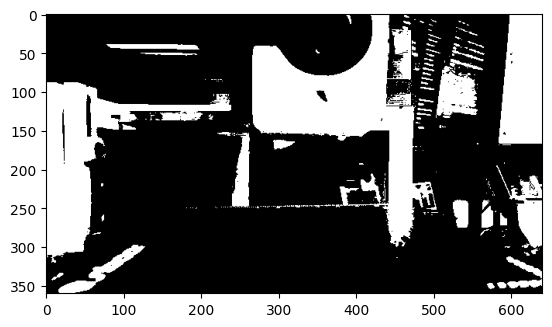

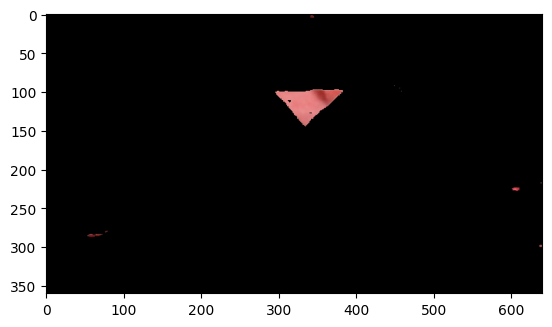

In [39]:
plt.imshow(binary_image, cmap='gray')
plt.show()

#plt.imshow(cv2.cvtColor(blue_binary_image, cv2.COLOR_BGR2RGB))
#plt.show()

plt.imshow(cv2.cvtColor(red_binary_image, cv2.COLOR_BGR2RGB))
plt.show()


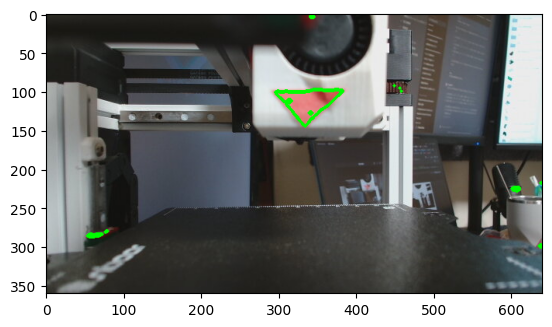

In [42]:
# ここでred_maskは既にバイナリ画像（単一チャンネル）
# このマスクを使って輪郭を検出する
contours, hierarchy = cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 輪郭を元の画像に描画する
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)

# 描画された輪郭を表示する
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.show()

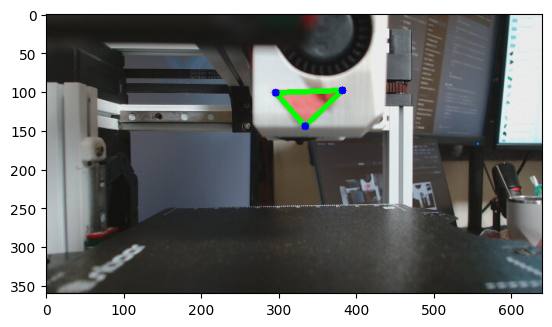

In [45]:
# 検出された輪郭に対してループ処理
for contour in contours:
    # 輪郭の周囲長を計算
    perimeter = cv2.arcLength(contour, True)

    # 輪郭の近似を行う
    approximation = cv2.approxPolyDP(contour, 0.02 * perimeter, True)

    # 近似された頂点の数が3の場合、三角形とみなす
    if len(approximation) == 3:
        # 三角形の輪郭を描画
        cv2.drawContours(image, [approximation], 0, (0, 255, 0), 5)
        # 三角形の頂点を描画（オプション）
        for point in approximation:
            cv2.circle(image, tuple(point[0]), 5, (255, 0, 0), -1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


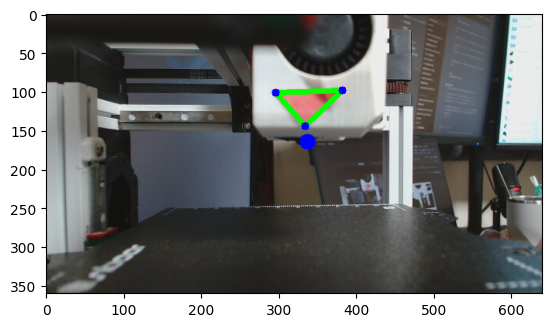

In [46]:
# 三角形の頂点を見つける
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approximation = cv2.approxPolyDP(contour, 0.02 * perimeter, True)

    if len(approximation) == 3:
        # 重心の計算（三角形の平均座標）
        centroid = np.mean(approximation, axis=0, dtype=int)[0]

        # ノズルは三角形の印の直下にあると仮定してオフセットを決定します
        # ここではオフセットを単純にY方向（画像の下方向）に設定します
        # オフセットの値は任意で調整してください
        nozzle_offset_y = 50  # 例としてY方向に50ピクセルオフセット

        # ノズルの位置をマーク
        nozzle_position = (centroid[0], centroid[1] + nozzle_offset_y)
        cv2.circle(image, nozzle_position, 10, (255, 0, 0), -1)

# マークされた画像を表示
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
